# Working with complicated dataset

Your name:Hishaam Ghayas

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [6]:
import pandas as pd

# URL for the BLAST results
BLAST_URL = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"

# Read the file and skip comment lines
data = pd.read_csv(
    BLAST_URL,
    comment="#",
    header=None
)

# Adjust the fields to match the number of columns in the dataset
fields = [
    "query acc.ver", "subject acc.ver", "% identity", "alignment length",
    "mismatches", "gap opens", "q. start", "q. end", "s. start", "s. end",
    "evalue", "bit score", "% positives", "bonds", "publications", "extra"
]

# Assign column names
data.columns = fields

# Drop the extra column and the "query acc.ver" column
data = data.drop(columns=["extra", "query acc.ver"])

# Set "subject acc.ver" as the index
data = data.set_index("subject acc.ver")

# Show the first five rows of the resulting DataFrame
print(data.head())


                 % identity  alignment length  mismatches  gap opens  \
subject acc.ver                                                        
NaN                     NaN               NaN         NaN        NaN   
NP_904328.1         100.000             318.0         0.0        0.0   
AGK29621.1           99.686             318.0         1.0        0.0   
YP_220563.1          99.686             318.0         1.0        0.0   
ACM24502.1           99.686             318.0         1.0        0.0   

                 q. start  q. end  s. start  s. end  evalue  bit score  \
subject acc.ver                                                          
NaN                   NaN     NaN       NaN     NaN     NaN        NaN   
NP_904328.1           1.0   318.0       1.0   318.0     0.0      629.0   
AGK29621.1            1.0   318.0       1.0   318.0     0.0      629.0   
YP_220563.1           1.0   318.0       1.0   318.0     0.0      627.0   
ACM24502.1            1.0   318.0       1.0   318.0

### Question 2
What is the average number of publications?

In [7]:
import pandas as pd

# URL for the BLAST results
BLAST_URL = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"

# Read the file and skip comment lines
data = pd.read_csv(
    BLAST_URL,
    comment="#",
    header=None
)

# Adjust the fields to match the number of columns in the dataset
fields = [
    "query acc.ver", "subject acc.ver", "% identity", "alignment length",
    "mismatches", "gap opens", "q. start", "q. end", "s. start", "s. end",
    "evalue", "bit score", "% positives", "bonds", "publications", "extra"
]

# Assign column names
data.columns = fields

# Drop the extra column and the "query acc.ver" column
data = data.drop(columns=["extra", "query acc.ver"])

# Set "subject acc.ver" as the index
data = data.set_index("subject acc.ver")

# Convert the "publications" column to numeric, handling any non-numeric entries
data["publications"] = pd.to_numeric(data["publications"], errors="coerce")

# Calculate the average number of publications
average_publications = data["publications"].mean()

average_publications


np.float64(26.989690721649485)

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [8]:
### Your code here . . .
# Convert the "bonds" column to numeric, handling non-numeric entries
data["bonds"] = pd.to_numeric(data["bonds"], errors="coerce")

# Filter for rows where bonds are greater than 15,000
high_bonds = data[data["bonds"] > 15000]

# List the subject acc.ver with over 15,000 bonds
high_bonds_list = high_bonds.index.tolist()

print(high_bonds_list)


[]


In [9]:
# Display the unique values in the "bonds" column
print(data["bonds"].unique())


[nan]


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

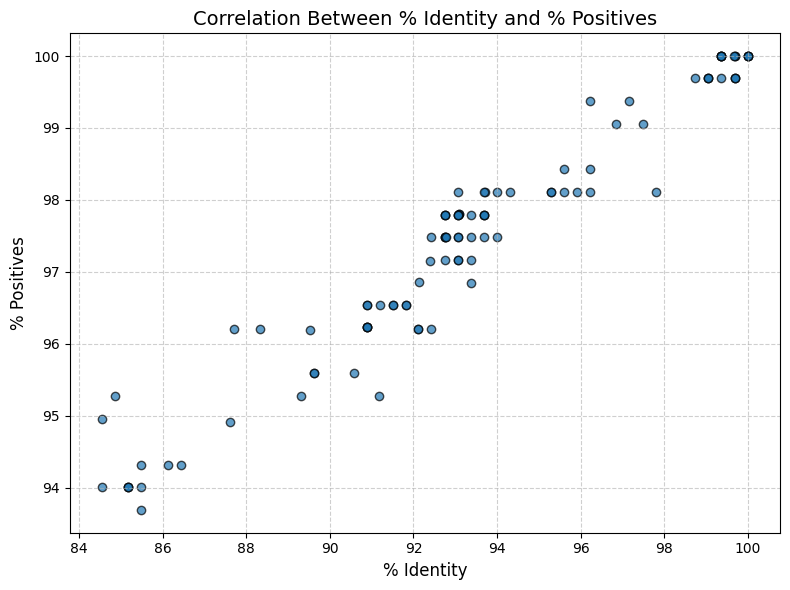

In [10]:
import matplotlib.pyplot as plt

# Ensure "% identity" and "% positives" columns are numeric
data["% identity"] = pd.to_numeric(data["% identity"], errors="coerce")
data["% positives"] = pd.to_numeric(data["% positives"], errors="coerce")

# Create a scatter plot to show the correlation
plt.figure(figsize=(8, 6))
plt.scatter(data["% identity"], data["% positives"], alpha=0.7, edgecolor="k")
plt.title("Correlation Between % Identity and % Positives", fontsize=14)
plt.xlabel("% Identity", fontsize=12)
plt.ylabel("% Positives", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [11]:
# URL for the protein source data
PROTEIN_SOURCE_URL = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv"

# Load the protein source data
protein_source_data = pd.read_csv(PROTEIN_SOURCE_URL)

# Merge the protein source data with the existing dataframe
merged_data = data.reset_index().merge(
    protein_source_data,
    how="left",
    left_on="subject acc.ver",
    right_on="Protein"
)

# Drop the redundant "Protein" column after merging and set index back
merged_data = merged_data.drop(columns=["Protein"]).set_index("subject acc.ver")

# Show the first five rows of the merged dataframe
print(merged_data.head())


                 % identity  alignment length  mismatches  gap opens  \
subject acc.ver                                                        
NaN                     NaN               NaN         NaN        NaN   
NP_904328.1         100.000             318.0         0.0        0.0   
AGK29621.1           99.686             318.0         1.0        0.0   
YP_220563.1          99.686             318.0         1.0        0.0   
ACM24502.1           99.686             318.0         1.0        0.0   

                 q. start  q. end  s. start  s. end  evalue  bit score  \
subject acc.ver                                                          
NaN                   NaN     NaN       NaN     NaN     NaN        NaN   
NP_904328.1           1.0   318.0       1.0   318.0     0.0      629.0   
AGK29621.1            1.0   318.0       1.0   318.0     0.0      629.0   
YP_220563.1           1.0   318.0       1.0   318.0     0.0      627.0   
ACM24502.1            1.0   318.0       1.0   318.0